In [1]:
from scipy.stats import norm, skew
from scipy import stats
import numpy as np
import pandas as pd
import statsmodels.api as sm 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from fancyimpute import KNN

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as mtick
import matplotlib 
from IPython.display import display
from pandas.plotting import scatter_matrix


%matplotlib inline
color = sns.color_palette()
pd.options.display.max_columns = None

In [4]:
df = pd.ExcelFile("UVAQA0864X.xlsx")

In [5]:
dt=pd.read_excel(df,'Exhibit 1 -- Data')
print(dt.head)

<bound method NDFrame.head of                                                      ID Program.Code  \
0                                                     1           HS   
1                                                     2           HC   
2                                                     3           HD   
3                                                     4           HN   
4                                                     5           HD   
...                                                 ...          ...   
2387                                               2388           HS   
2388                                               2389           HD   
2389                                                NaN          NaN   
2390                                                NaN          NaN   
2391  Data source: Company data adjusted by author u...          NaN   

      From.Grade  To.Grade Group.State  Is.Non.Annual.  Days Travel.Type  \
0            4.0       4.0   

In [6]:
dt.describe()

,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,CRM.Segment,Parent.Meeting.Flag,MDR.High.Grade,Total.School.Enrollment,EZ.Pay.Take.Up.Rate,School.Sponsor,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
count,2262.000000,2239.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2385.000000,2389.000000,2321.000000,2298.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2052.000000,2052.000000,2389.000000,2298.000000,2389.000000,2389.000000,2389.000000
mean,7.268347,7.912908,0.154039,4.575136,1615.217664,16.867727,3.305567,0.570743,4.807451,2.953537,6.920335,0.858937,8.392072,648.358573,0.207943,0.105902,31.297195,34.250733,1615.217664,1.102135,262.083821,228.978070,0.556718,0.066184,0.900667,2.953537,0.607367
std,1.388350,1.558226,0.361062,1.432128,645.096047,16.942782,3.677022,0.230666,4.661194,2.876422,2.745410,0.348160,1.746328,411.727720,0.155654,0.307777,29.131503,31.590096,645.096047,0.611544,79.520208,53.636014,0.496877,0.081112,0.049119,2.876422,0.488439
min,3.000000,3.000000,0.000000,1.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,19.000000,0.000000,0.000000,2.000000,2.000000,79.000000,0.000000,-204.000000,-204.000000,0.000000,0.000922,0.600000,0.000000,0.000000
25%,7.000000,8.000000,0.000000,4.000000,1174.000000,6.000000,1.000000,0.455000,2.000000,1.000000,5.000000,1.000000,8.000000,360.000000,0.100000,0.000000,12.000000,14.000000,1174.000000,1.000000,208.000000,196.750000,0.000000,0.020787,0.882353,1.000000,0.000000
50%,8.000000,8.000000,0.000000,5.000000,1700.000000,12.000000,2.000000,0.600000,4.000000,2.000000,6.000000,1.000000,8.000000,597.000000,0.200000,0.000000,23.000000,26.000000,1700.000000,1.000000,250.000000,233.000000,1.000000,0.045256,0.909091,2.000000,1.000000
75%,8.000000,8.000000,0.000000,5.000000,2048.000000,23.000000,4.000000,0.727000,6.000000,4.000000,10.000000,1.000000,8.000000,825.750000,0.292000,0.000000,41.000000,44.000000,2048.000000,1.000000,287.000000,261.000000,1.000000,0.087517,0.933333,4.000000,1.000000
max,12.000000,12.000000,1.000000,12.000000,4200.000000,257.000000,45.000000,1.000000,39.000000,47.000000,11.000000,1.000000,12.000000,3990.000000,1.750000,1.000000,286.000000,313.000000,4200.000000,2.000000,749.000000,749.000000,1.000000,2.052632,1.000000,47.000000,1.000000


In [7]:
dt.loc[dt["Retained.in.2012."] == 0].describe()

,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,CRM.Segment,Parent.Meeting.Flag,MDR.High.Grade,Total.School.Enrollment,EZ.Pay.Take.Up.Rate,School.Sponsor,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
count,881.000000,874.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,935.000000,938.000000,908.000000,901.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,814.000000,814.000000,938.000000,901.000000,938.000000,938.000000,938.0
mean,7.123723,8.303204,0.329424,4.663113,1710.687633,11.590618,2.973348,0.575523,4.523454,2.180171,6.950802,0.867804,8.686123,604.349612,0.211438,0.059701,21.837953,24.018124,1710.687633,1.141791,274.851351,235.826781,0.275053,0.058946,0.891804,2.180171,0.0
std,1.478449,1.758843,0.470255,1.420818,645.925150,10.793828,3.418877,0.244907,4.462817,1.924551,2.836693,0.338885,1.999875,449.870652,0.176601,0.237059,20.189480,21.786994,645.925150,0.621684,87.830255,60.224371,0.446779,0.067825,0.055061,1.924551,0.0
min,3.000000,4.000000,0.000000,1.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,36.000000,0.000000,0.000000,2.000000,2.000000,119.000000,0.000000,-188.000000,-188.000000,0.000000,0.000922,0.600000,0.000000,0.0
25%,6.000000,8.000000,0.000000,4.000000,1399.000000,4.000000,1.000000,0.429000,2.000000,1.000000,5.000000,1.000000,8.000000,300.000000,0.083000,0.000000,9.000000,10.000000,1399.000000,1.000000,216.000000,201.000000,0.000000,0.014953,0.875000,1.000000,0.0
50%,7.000000,8.000000,0.000000,5.000000,1827.500000,9.000000,2.000000,0.600000,3.000000,2.000000,7.000000,1.000000,8.000000,520.000000,0.200000,0.000000,16.000000,18.000000,1827.500000,1.000000,259.000000,240.500000,0.000000,0.036496,0.902832,2.000000,0.0
75%,8.000000,8.000000,1.000000,5.000000,2067.750000,15.000000,4.000000,0.750000,6.000000,3.000000,10.000000,1.000000,9.000000,768.000000,0.308000,0.000000,29.000000,31.000000,2067.750000,2.000000,326.000000,265.000000,1.000000,0.076602,0.927359,3.000000,0.0
max,12.000000,12.000000,1.000000,11.000000,4199.000000,104.000000,45.000000,1.000000,38.000000,20.000000,11.000000,1.000000,12.000000,3100.000000,1.750000,1.000000,230.000000,250.000000,4199.000000,2.000000,749.000000,749.000000,1.000000,0.500000,1.000000,20.000000,0.0


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2390 non-null   object        
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

In [9]:
print(dt.columns.to_series().groupby(dt.dtypes).groups)

{float64: ['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled', 'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'CRM.Segment', 'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate', 'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'SingleGradeTripFlag', 'FPP.to.School.enrollment', 'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'Retained.in.2012.'], datetime64[ns]: ['Departure.Date', 'Return.Date', 'Deposit.Date', 'Early.RPL', 'Latest.RPL', 'Initial.System.Date', 'FirstMeeting', 'LastMeeting'], object: ['ID', 'Program.Code', 'Group.State', 'Travel.Type', 'Special.Pay', 'Poverty.Code', 'Region', 'School.Type', 'MDR.Low.Grade', 'Income.Level', 'SPR.Product.Type', 'SPR.New.Existing', 'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth', 'GroupGradeTypeLow', 'GroupGradeTypeHigh

In [10]:
print(dt.isna().any())

ID                                True
Program.Code                      True
From.Grade                        True
To.Grade                          True
Group.State                       True
Is.Non.Annual.                    True
Days                              True
Travel.Type                       True
Departure.Date                    True
Return.Date                       True
Deposit.Date                      True
Special.Pay                       True
Tuition                           True
FRP.Active                        True
FRP.Cancelled                     True
FRP.Take.up.percent.              True
Early.RPL                         True
Latest.RPL                        True
Cancelled.Pax                     True
Total.Discount.Pax                True
Initial.System.Date               True
Poverty.Code                      True
Region                            True
CRM.Segment                       True
School.Type                       True
Parent.Meeting.Flag      

In [11]:
dt["Deposit.Date"]

0      2010-08-30
1      2009-11-15
2      2010-10-15
3      2011-01-07
4      2010-09-30
          ...    
2387   2010-12-17
2388   2010-10-29
2389          NaT
2390          NaT
2391          NaT
Name: Deposit.Date, Length: 2392, dtype: datetime64[ns]

In [12]:
print(dt.shape)

(2392, 56)


In [13]:
dt.isnull().sum(axis = 0)

ID                                   2
Program.Code                         3
From.Grade                         130
To.Grade                           153
Group.State                          3
Is.Non.Annual.                       3
Days                                 3
Travel.Type                          3
Departure.Date                       3
Return.Date                          3
Deposit.Date                         3
Special.Pay                       1922
Tuition                              3
FRP.Active                           3
FRP.Cancelled                        3
FRP.Take.up.percent.                 3
Early.RPL                          676
Latest.RPL                          22
Cancelled.Pax                        3
Total.Discount.Pax                   3
Initial.System.Date                 11
Poverty.Code                       602
Region                               3
CRM.Segment                          7
School.Type                          3
Parent.Meeting.Flag      

In [14]:
dt = dt.drop(index=dt[dt["ID"].isnull()].index,axis=0)

In [15]:
dt

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,2010-08-30,NaN,424.0,25.0,3.0,0.424,2010-03-29,2010-08-12,3.0,4.0,2010-03-26,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,2010-08-12,2010-08-12,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,2009-11-15,CP,2350.0,9.0,9.0,0.409,2009-10-20,2010-08-10,11.0,3.0,2009-10-02,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,2009-11-17,2010-08-27,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,2010-10-15,NaN,1181.0,17.0,6.0,0.708,2010-04-29,2010-08-16,6.0,3.0,2010-01-28,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,2010-09-13,2010-09-13,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,2011-01-07,NaN,376.0,0.0,0.0,0.000,NaT,NaT,1.0,0.0,2010-10-19,NaN,Other,7.0,CHD,0.0,NaN,NaN,NaN,NaN,0.000,0.0,East Coast,EXISTING,18.0,18.0,376.0,0.0,NaT,NaT,NaN,NaN,High,High,High->High,January,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,2010-09-30,NaN,865.0,40.0,8.0,0.494,2010-03-29,2010-08-12,9.0,8.0,2010-03-23,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,2010-08-24,2010-08-24,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,2386,HD,8.0,8.0,CA,0.0,5.0,A,2011-06-29,2011-07-03,2010-10-15,FR,1699.0,16.0,4.0,0.800,2010-04-26,2010-09-07,4.0,2.0,2010-04-27,C,Southern California,4.0,PUBLIC,1.0,K,6.0,575.0,Q,0.350,0.0,East Coast,EXISTING,20.0,22.0,1699.0,2.0,2010-05-06,2010-10-07,419.0,265.0,Middle,Middle,Middle->Middle,June,K,Middle,K->Middle,H,1.0,0.034783,0.909091,2.0,S-M,1.0
2386,2387,HD,10.0,12.0,CA,0.0,6.0,A,2011-06-29,2011-07-05,2011-01-18,SA,2149.0,0.0,0.0,0.000,NaT,2010-12-08,0.0,4.0,2010-12-08,NaN,Northern California,7.0,PUBLIC,0.0,NaN,NaN,NaN,NaN,0.000,0.0,East Coast,NEW,30.0,34.0,2149.0,0.0,NaT,NaT,NaN,NaN,High,High,High->High,June,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,0.882353,4.0,NaN,1.0
2387,2388,HS,4.0,4.0,CA,0.0,1.0,A,2011-06-30,2011-06-30,2010-12-17,NaN,449.0,3.0,2.0,0.188,NaT,2010-09-07,1.0,1.0,2010-09-04,NaN,Southern California,NaN,CHD,1.0,NaN,NaN,NaN,NaN,0.188,0.0,CA History,NEW,16.0,17.0,449.0,1.0,2010-09-16,2010-09-16,287.0,287.0,Elementary,Elementary,Elementary->Elementary,June,Undefined,Undefined,Undefined->Undefined,H,1.0,NaN,0.941176,1.0,NaN,1.0
2388,2389,HD,8.0,8.0,WA,0.0,6.0,A,2011-06-30,2011-07-05,2010-10-29,NaN,2135.0,15.0,9.0,0.6

In [16]:
print(dt.iloc[2389:,:1].to_string())


                                                                             ID
2391  Data source: Company data adjusted by author using unspecified constants.


In [17]:
dt = dt.drop(index=2391, axis=0)

In [18]:
dt

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,2010-08-30,NaN,424.0,25.0,3.0,0.424,2010-03-29,2010-08-12,3.0,4.0,2010-03-26,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,2010-08-12,2010-08-12,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,2009-11-15,CP,2350.0,9.0,9.0,0.409,2009-10-20,2010-08-10,11.0,3.0,2009-10-02,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,2009-11-17,2010-08-27,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,2010-10-15,NaN,1181.0,17.0,6.0,0.708,2010-04-29,2010-08-16,6.0,3.0,2010-01-28,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,2010-09-13,2010-09-13,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,2011-01-07,NaN,376.0,0.0,0.0,0.000,NaT,NaT,1.0,0.0,2010-10-19,NaN,Other,7.0,CHD,0.0,NaN,NaN,NaN,NaN,0.000,0.0,East Coast,EXISTING,18.0,18.0,376.0,0.0,NaT,NaT,NaN,NaN,High,High,High->High,January,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,2010-09-30,NaN,865.0,40.0,8.0,0.494,2010-03-29,2010-08-12,9.0,8.0,2010-03-23,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,2010-08-24,2010-08-24,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,2385,HC,7.0,8.0,CA,0.0,5.0,A,2011-06-28,2011-07-02,2010-12-15,NaN,1892.0,18.0,4.0,0.514,NaT,2010-11-04,7.0,3.0,2010-11-04,C,Southern California,10.0,PUBLIC,0.0,6,8.0,1844.0,D,0.057,0.0,East Coast,EXISTING,35.0,38.0,1892.0,0.0,NaT,NaT,NaN,NaN,Middle,Middle,Middle->Middle,June,Middle,Middle,Middle->Middle,H,0.0,0.018980,0.921053,3.0,L,0.0
2385,2386,HD,8.0,8.0,CA,0.0,5.0,A,2011-06-29,2011-07-03,2010-10-15,FR,1699.0,16.0,4.0,0.800,2010-04-26,2010-09-07,4.0,2.0,2010-04-27,C,Southern California,4.0,PUBLIC,1.0,K,6.0,575.0,Q,0.350,0.0,East Coast,EXISTING,20.0,22.0,1699.0,2.0,2010-05-06,2010-10-07,419.0,265.0,Middle,Middle,Middle->Middle,June,K,Middle,K->Middle,H,1.0,0.034783,0.909091,2.0,S-M,1.0
2386,2387,HD,10.0,12.0,CA,0.0,6.0,A,2011-06-29,2011-07-05,2011-01-18,SA,2149.0,0.0,0.0,0.000,NaT,2010-12-08,0.0,4.0,2010-12-08,NaN,Northern California,7.0,PUBLIC,0.0,NaN,NaN,NaN,NaN,0.000,0.0,East Coast,NEW,30.0,34.0,2149.0,0.0,NaT,NaT,NaN,NaN,High,High,High->High,June,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,0.882353,4.0,NaN,1.0
2387,2388,HS,4.0,4.0,CA,0.0,1.0,A,2011-06-30,2011-06-30,2010-12-17,NaN,449.0,3.0,2.0,0.188,NaT,2010-09-07,1.0,1.0,2010-09-04

In [19]:
datetime_columns = ["Departure.Date","Return.Date","Deposit.Date","Initial.System.Date",'Early.RPL', 'Latest.RPL','FirstMeeting', 'LastMeeting']
categorical_columns = [
       'From.Grade', 'To.Grade', 'Program.Code', 'Group.State', 'Is.Non.Annual.',
       'Travel.Type', 'Special.Pay', 'Poverty.Code', 'Region', 
       'CRM.Segment', 'School.Type', 'Parent.Meeting.Flag','Income.Level',
       'School.Sponsor','SPR.Product.Type', 'SPR.New.Existing',"SingleGradeTripFlag",
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType', 
       'DepartureMonth','GroupGradeTypeLow', 'GroupGradeTypeHigh', 
       'GroupGradeType', 'MajorProgramCode', 'SchoolSizeIndicator',
       'MDR.Low.Grade', 'MDR.High.Grade', 'Retained.in.2012.'
       ]

numerical_columns = [
       'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled', 
       'FRP.Take.up.percent.', 'Cancelled.Pax',
       'Total.Discount.Pax', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
       'FPP', 'Total.Pax', 'SPR.Group.Revenue',
       'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment', 
       'FPP.to.PAX', 'Num.of.Non_FPP.PAX',
       ]

In [20]:
dt = dt.set_index("ID")

D:\anaconda\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [21]:

for d in datetime_columns:
  dt[d] = pd.to_datetime(dt[d], dayfirst=False)
for c in categorical_columns:
  dt[c] = dt[c].astype("category")
for n in numerical_columns:
  dt[n] = dt[n].astype("float64")

In [22]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 1 to 2389
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Program.Code                    2389 non-null   category      
 1   From.Grade                      2262 non-null   category      
 2   To.Grade                        2239 non-null   category      
 3   Group.State                     2389 non-null   category      
 4   Is.Non.Annual.                  2389 non-null   category      
 5   Days                            2389 non-null   float64       
 6   Travel.Type                     2389 non-null   category      
 7   Departure.Date                  2389 non-null   datetime64[ns]
 8   Return.Date                     2389 non-null   datetime64[ns]
 9   Deposit.Date                    2389 non-null   datetime64[ns]
 10  Special.Pay                     470 non-null    category      
 11  Tuit

In [23]:
for c in categorical_columns:
  print(f"|{dt[c].name}:\n |Unique Values :{dt[c].nunique()}\n |Example: {dt[c].value_counts()}")

|From.Grade:
 |Unique Values :10
 |Example: 8.0     1121
7.0      515
6.0      226
4.0      160
5.0       94
9.0       75
11.0      32
10.0      24
12.0      10
3.0        5
Name: From.Grade, dtype: int64
|To.Grade:
 |Unique Values :10
 |Example: 8.0     1646
4.0      132
12.0     130
9.0       97
7.0       75
5.0       63
6.0       57
11.0      23
10.0      15
3.0        1
Name: To.Grade, dtype: int64
|Program.Code:
 |Unique Values :28
 |Example: HD     1430
HC      274
HS      131
CD      114
HN       73
SK       68
HVP      62
SC       46
ST       28
HG       25
SM       23
SG       20
CC       14
IC       12
HO       11
HW        9
HZ        7
HY        7
HF        6
HIS       5
SD        4
CN        4
HX        3
IK        3
CVP       3
HP        3
HH        3
FN        1
Name: Program.Code, dtype: int64
|Group.State:
 |Unique Values :54
 |Example: CA                718
TX                308
WA                147
IL                104
CO                 89
MI                 71
FL

<AxesSubplot:ylabel='Group.State'>

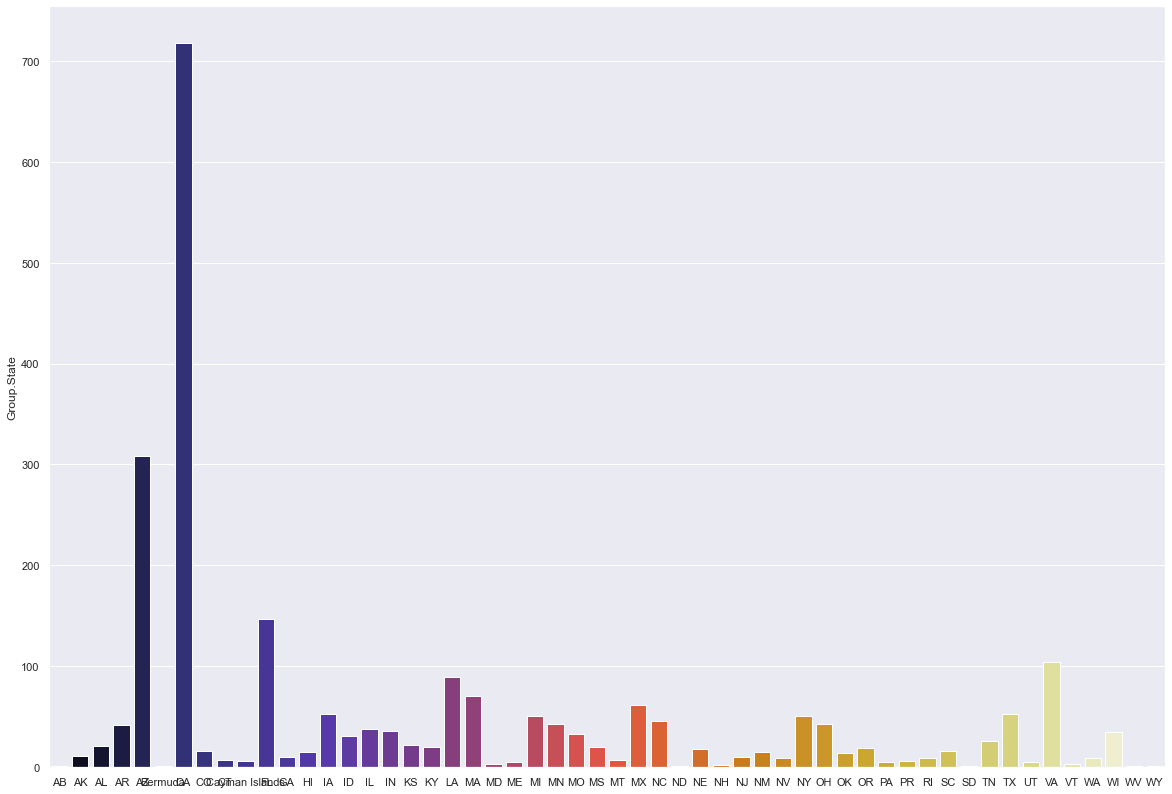

In [24]:
sns.set(font_scale=1)
plt.figure(figsize=(20,14))
sns.barplot(x=dt["Group.State"].unique(), y=dt["Group.State"].value_counts(), data=dt,palette="CMRmap")

In [25]:
dt["Group.State"]

ID
1       CA
2       AZ
3       FL
4       VA
5       FL
        ..
2385    CA
2386    CA
2387    CA
2388    CA
2389    WA
Name: Group.State, Length: 2389, dtype: category
Categories (54, object): ['AB', 'AK', 'AL', 'AR', ..., 'WA', 'WI', 'WV', 'WY']

D:\anaconda\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot:ylabel='Is.Non.Annual.'>

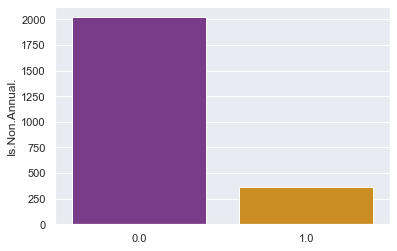

In [26]:
sns.barplot(x=dt["Is.Non.Annual."].unique(), y=dt["Is.Non.Annual."].value_counts(), data=dt, palette="CMRmap")

** data preprocessing

In [27]:
dt.isnull().sum(axis = 0)

Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag                  0
MDR.Low.Grade            

In [28]:
NAfeature= [
    "Special.Pay", #NA means STC collects money directly
    "Early.RPL", #those that have no communication from STC came themselves
    "FirstMeeting",#no meetings held if NA
    "DifferenceTraveltoFirstMeeting", #no meeting Held
    "DifferenceTraveltoLastMeeting", #no meeting Held
    "LastMeeting", #no meeting held
    "Latest.RPL"]

In [29]:
print(dt.columns[dt.isnull().sum()>0])

Index(['From.Grade', 'To.Grade', 'Special.Pay', 'Early.RPL', 'Latest.RPL',
       'Initial.System.Date', 'Poverty.Code', 'CRM.Segment', 'MDR.Low.Grade',
       'MDR.High.Grade', 'Total.School.Enrollment', 'Income.Level',
       'FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
       'SchoolSizeIndicator'],
      dtype='object')


In [30]:
for c in NAfeature:
  if dt[c].dtype.name == 'category':
    dt[c] = dt[c].cat.add_categories("Not Available")
    dt[c] = dt[c].fillna("Not Available")

In [31]:
print(f"|{dt.isnull().sum()}:\n|{dt.columns[dt.isnull().sum()>0]}")

|Program.Code                        0
From.Grade                        127
To.Grade                          150
Group.State                         0
Is.Non.Annual.                      0
Days                                0
Travel.Type                         0
Departure.Date                      0
Return.Date                         0
Deposit.Date                        0
Special.Pay                         0
Tuition                             0
FRP.Active                          0
FRP.Cancelled                       0
FRP.Take.up.percent.                0
Early.RPL                         673
Latest.RPL                         19
Cancelled.Pax                       0
Total.Discount.Pax                  0
Initial.System.Date                 8
Poverty.Code                      599
Region                              0
CRM.Segment                         4
School.Type                         0
Parent.Meeting.Flag                 0
MDR.Low.Grade                      68
MDR.High.Gr

In [32]:
dt["FirstMeet"]=(dt["FirstMeeting"].notnull())
dt["FirstMeet"] = dt["FirstMeet"].astype("int64")


In [33]:
dt["FirstMeet"]= dt["FirstMeet"].astype("category")
categorical_columns.append("FirstMeet")

In [34]:
dt["FirstMeet"].value_counts()

1    2052
0     337
Name: FirstMeet, dtype: int64

In [35]:
dt[["DifferenceTraveltoFirstMeeting","DifferenceTraveltoLastMeeting"]] = dt[["DifferenceTraveltoFirstMeeting","DifferenceTraveltoLastMeeting"]].fillna(value=0)

In [36]:
to_impute = pd.DataFrame(index=dt.index)
for i in dt:
  if dt[i].dtype.name == "float64":
    if dt[i].isnull().sum() != 0:
      print(dt[i].name, dt[i].isnull().sum(), dt[i].dtype)
      to_impute[i] = dt[i]

Total.School.Enrollment 91 float64
FPP.to.School.enrollment 91 float64


In [37]:
to_impute

,Total.School.Enrollment,FPP.to.School.enrollment
ID,,
1,927.0,0.063646
2,850.0,0.025882
3,955.0,0.025131
4,NaN,NaN
5,720.0,0.112500
...,...,...
2385,1844.0,0.018980
2386,575.0,0.034783
2387,NaN,NaN


knn

In [38]:
imputer = KNNImputer(n_neighbors=5)

to_impute = pd.DataFrame(imputer.fit_transform(to_impute),columns = to_impute.columns, index=dt.index)
for i in to_impute:
  dt[i] = to_impute[i]

In [39]:
t_impute = pd.DataFrame(index=dt.index)
for i in dt:
  if dt[i].dtype.name == "category":
    if dt[i].isnull().sum() != 0:
      print(dt[i].name, dt[i].isnull().sum(), dt[i].dtype)
      t_impute[i] = dt[i]

From.Grade 127 category
To.Grade 150 category
Poverty.Code 599 category
CRM.Segment 4 category
MDR.Low.Grade 68 category
MDR.High.Grade 68 category
Income.Level 62 category
SchoolSizeIndicator 91 category


In [40]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 1 to 2389
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Program.Code                    2389 non-null   category      
 1   From.Grade                      2262 non-null   category      
 2   To.Grade                        2239 non-null   category      
 3   Group.State                     2389 non-null   category      
 4   Is.Non.Annual.                  2389 non-null   category      
 5   Days                            2389 non-null   float64       
 6   Travel.Type                     2389 non-null   category      
 7   Departure.Date                  2389 non-null   datetime64[ns]
 8   Return.Date                     2389 non-null   datetime64[ns]
 9   Deposit.Date                    2389 non-null   datetime64[ns]
 10  Special.Pay                     2389 non-null   category      
 11  Tuit

In [41]:
print(f"|{dt.isnull().sum()}:\n|{dt.columns[dt.isnull().sum()>0]}")

|Program.Code                        0
From.Grade                        127
To.Grade                          150
Group.State                         0
Is.Non.Annual.                      0
Days                                0
Travel.Type                         0
Departure.Date                      0
Return.Date                         0
Deposit.Date                        0
Special.Pay                         0
Tuition                             0
FRP.Active                          0
FRP.Cancelled                       0
FRP.Take.up.percent.                0
Early.RPL                         673
Latest.RPL                         19
Cancelled.Pax                       0
Total.Discount.Pax                  0
Initial.System.Date                 8
Poverty.Code                      599
Region                              0
CRM.Segment                         4
School.Type                         0
Parent.Meeting.Flag                 0
MDR.Low.Grade                      68
MDR.High.Gr

In [42]:
dt1 = dt.copy()

In [43]:
dt1['From.Grade'].replace(' ', np.nan, regex=True,inplace=True)
dt1['To.Grade'].replace(' ', np.nan, regex=True,inplace=True)
dt1['Poverty.Code'].replace(' ', np.nan, regex=True,inplace=True)
dt1['SchoolSizeIndicator'].replace(' ', np.nan, regex=True,inplace=True)

In [44]:
dt1['From.Grade'].isnull().mean()

0.053160318124738384

In [45]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 1 to 2389
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Program.Code                    2389 non-null   category      
 1   From.Grade                      2262 non-null   category      
 2   To.Grade                        2239 non-null   category      
 3   Group.State                     2389 non-null   category      
 4   Is.Non.Annual.                  2389 non-null   category      
 5   Days                            2389 non-null   float64       
 6   Travel.Type                     2389 non-null   category      
 7   Departure.Date                  2389 non-null   datetime64[ns]
 8   Return.Date                     2389 non-null   datetime64[ns]
 9   Deposit.Date                    2389 non-null   datetime64[ns]
 10  Special.Pay                     2389 non-null   category      
 11  Tuit

In [46]:

FromGrade= LabelEncoder()
ToGrade= LabelEncoder()
ProgramCode= LabelEncoder() 
GroupState = LabelEncoder()
IsNonAnnual= LabelEncoder()
TravelType = LabelEncoder()
SpecialPay = LabelEncoder()
PovertyCode = LabelEncoder()
Region = LabelEncoder()
CRMSegment = LabelEncoder()
SchoolType = LabelEncoder()
ParentMeetingFlag = LabelEncoder()
IncomeLevel = LabelEncoder()
SchoolSponsor= LabelEncoder()
SPRProductType = LabelEncoder()
SPRNewExisting = LabelEncoder()
SingleGradeTripFlag= LabelEncoder()
SchoolGradeTypeLow = LabelEncoder()
SchoolGradeTypeHigh= LabelEncoder() 
SchoolGradeType = LabelEncoder()
DepartureMonth = LabelEncoder()
GroupGradeTypeLow = LabelEncoder()
GroupGradeTypeHigh = LabelEncoder()
GroupGradeType= LabelEncoder()
MajorProgramCode = LabelEncoder()
SchoolSizeIndicator= LabelEncoder() 
MDRLowGrade = LabelEncoder()
MDRHighGrade= LabelEncoder()
Retainedin2012= LabelEncoder()
FirstMeet = LabelEncoder()

dt1['From.Grade']=FromGrade.fit_transform(dt1['From.Grade'])
dt1['To.Grade']=ToGrade.fit_transform(dt1['To.Grade'])
dt1['Program.Code']=ProgramCode.fit_transform(dt1['Program.Code'])
dt1['Group.State']=GroupState.fit_transform(dt1['Group.State']) 
dt1['Is.Non.Annual.']=IsNonAnnual.fit_transform(dt1['Is.Non.Annual.'])
dt1['Travel.Type']=TravelType.fit_transform(dt1['Travel.Type']) 
dt1['Special.Pay']=SpecialPay.fit_transform(dt1['Special.Pay']) 
dt1['Poverty.Code']=PovertyCode.fit_transform(dt1['Poverty.Code']) 
dt1['CRM.Segment']=Region.fit_transform(dt1['CRM.Segment']) 
dt1['School.Type']=CRMSegment.fit_transform(dt1['School.Type']) 
dt1['Parent.Meeting.Flag']=SchoolType.fit_transform(dt1['Parent.Meeting.Flag']) 
dt1['Income.Level']=ParentMeetingFlag.fit_transform(dt1['Income.Level']) 
dt1['School.Sponsor']=IncomeLevel.fit_transform(dt1['School.Sponsor']) 
dt1['SPR.Product.Type']=SchoolSponsor.fit_transform(dt1['SPR.Product.Type'])
dt1['SPR.New.Existing']=SPRProductType.fit_transform(dt1['SPR.New.Existing']) 
dt1['SingleGradeTripFlag']=SPRNewExisting.fit_transform(dt1['SingleGradeTripFlag']) 
dt1['SchoolGradeTypeLow']=SingleGradeTripFlag.fit_transform(dt1['SchoolGradeTypeLow'])
dt1['SchoolGradeTypeHigh']=SchoolGradeTypeLow.fit_transform(dt1['SchoolGradeTypeHigh']) 
dt1['Gender']=SchoolGradeTypeHigh.fit_transform(dt1['ProgramCode'])
dt1['SchoolGradeType']=SchoolGradeType.fit_transform(dt1['SchoolGradeType']) 
dt1['DepartureMonth']=DepartureMonth.fit_transform(dt1['DepartureMonth'])
dt1['GroupGradeTypeLow']=GroupGradeTypeLow.fit_transform(dt1['GroupGradeTypeLow ']) 
dt1['GroupGradeTypeHigh']=GroupGradeTypeHigh.fit_transform(dt1['GroupGradeTypeHigh']) 
dt1['GroupGradeType']=GroupGradeType.fit_transform(dt1['GroupGradeType'])
dt1['MajorProgramCode']=MajorProgramCode.fit_transform(dt1['MajorProgramCode']) 
dt1['SchoolSizeIndicator']=SchoolSizeIndicator.fit_transform(dt1['SchoolSizeIndicator'])
dt1['MDR.Low.Grade']=MDRLowGrade.fit_transform(dt1['MDR.Low.Grade']) 
dt1['MDR.High.Grade']=MDRHighGrade.fit_transform(dt1['MDR.High.Grade'])
dt1['Retained.in.2012.']=Retainedin2012.fit_transform(dt1['Retained.in.2012.'])
dt1['FirstMeet']=FirstMeet.fit_transform(dt1['FirstMeet'])

for c in categorical_columns:
  print(dt1[c].name, dt1[c].isnull().sum(), dt1[c].dtype )

dt1['From.Grade']=dt1['From.Grade'].astype(float)
dt1['To.Grade']=dt1['To.Grade'].astype(float)
dt1['Program.Code']=dt1['Program.Code'].astype(float)
dt1['Group.State']=dt1['Group.State'].astype(float) 
dt1['Is.Non.Annual.']=dt1['Is.Non.Annual.'].astype(float)
dt1['Travel.Type']=dt1['Travel.Type'].astype(float) 
dt1['Special.Pay']=dt1['Special.Pay'].astype(float)
dt1['Poverty.Code']=dt1['Poverty.Code'].astype(float)
dt1['CRM.Segment']=dt1['CRM.Segment'].astype(float) 
dt1['School.Type']=dt1['School.Type'].astype(float) 
dt1['Parent.Meeting.Flag']=dt1['Parent.Meeting.Flag'].astype(float) 
dt1['Income.Level']=dt1['Income.Level'].astype(float)  
dt1['School.Sponsor']=dt1['School.Sponsor'].astype(float)  
dt1['SPR.Product.Type']=dt1['SPR.Product.Type'].astype(float) 
dt1['SPR.New.Existing']=dt1['SPR.New.Existing'].astype(float)  
dt1['SingleGradeTripFlag']=dt1['SingleGradeTripFlag'].astype(float)  
dt1['SchoolGradeTypeLow']=dt1['SchoolGradeTypeLow']
dt1['SchoolGradeTypeHigh']=dt1['SchoolGradeTypeHigh'].astype(float)  
dt1['Gender']=dt1['ProgramCode'].astype(float) 
dt1['SchoolGradeType']=dt1['SchoolGradeType'].astype(float)  
dt1['DepartureMonth']=dt1['DepartureMonth'].astype(float) 
dt1['GroupGradeTypeLow']=dt1['GroupGradeTypeLow '].astype(float)  
dt1['GroupGradeTypeHigh']=dt1['GroupGradeTypeHigh'].astype(float)  
dt1['GroupGradeType']=GroupGradeType.fit_transform(dt1['GroupGradeType'].astype(float) 
dt1['MajorProgramCode']=dt1['MajorProgramCode'].astype(float) 
dt1['SchoolSizeIndicator']=dt1['SchoolSizeIndicator'].astype(float) 
dt1['MDR.Low.Grade']=dt1['MDR.Low.Grade'].astype(float)  
dt1['MDR.High.Grade']=dt1['MDR.High.Grade'].astype(float) 
dt1['Retained.in.2012.']=dt1['Retained.in.2012.'].astype(float) 
dt1['FirstMeet']=dt1['FirstMeet'].astype(float) 

In [47]:
dummy=dt1.copy()

In [48]:
print(f"|{dummy.isnull().sum()}:\n|{dummy.columns[dt.isnull().sum()>0]}")

|Program.Code                        0
From.Grade                        127
To.Grade                          150
Group.State                         0
Is.Non.Annual.                      0
Days                                0
Travel.Type                         0
Departure.Date                      0
Return.Date                         0
Deposit.Date                        0
Special.Pay                         0
Tuition                             0
FRP.Active                          0
FRP.Cancelled                       0
FRP.Take.up.percent.                0
Early.RPL                         673
Latest.RPL                         19
Cancelled.Pax                       0
Total.Discount.Pax                  0
Initial.System.Date                 8
Poverty.Code                      599
Region                              0
CRM.Segment                         4
School.Type                         0
Parent.Meeting.Flag                 0
MDR.Low.Grade                      68
MDR.High.Gr

In [49]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
dummy["From.Grade"] = imp.fit_transform(dummy[["From.Grade"]]).ravel()
dummy["To.Grade"] = imp.fit_transform(dummy[["To.Grade"]]).ravel()
#dummy["Early.RPL"] = imp.fit_transform(dummy[["Early.RPL"]]).ravel()
#dummy["Latest.RPL"] = imp.fit_transform(dummy[["Latest.RPL"]]).ravel()
dummy["Poverty.Code"] = imp.fit_transform(dummy[["Poverty.Code"]]).ravel()
#dummy["FirstMeeting"] = imp.fit_transform(dummy[["FirstMeeting "]]).ravel()
dummy["SchoolSizeIndicator"] = imp.fit_transform(dummy[["SchoolSizeIndicator"]]).ravel()
#dummy["LastMeeting"] = imp.fit_transform(dummy[["LastMeeting"]]).ravel

In [50]:
dummy.drop(columns=["Early.RPL","Latest.RPL","FirstMeeting","LastMeeting","Return.Date","Deposit.Date","Initial.System.Date","Early.RPL","Departure.Date"],inplace=True, axis=1)
dummy

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,FirstMeet
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,HS,4.0,4.0,CA,0.0,1.0,A,Not Available,424.0,25.0,3.0,0.424,3.0,4.0,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.000000,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0,1
2,HC,8.0,8.0,AZ,0.0,7.0,A,CP,2350.0,9.0,9.0,0.409,11.0,3.0,C,Other,10.0,PUBLIC,1.0,7,8.0,850.000000,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0,1
3,HD,8.0,8.0,FL,0.0,3.0,A,Not Available,1181.0,17.0,6.0,0.708,6.0,3.0,C,Other,10.0,PUBLIC,1.0,6,8.0,955.000000,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0,1
4,HN,9.0,12.0,VA,1.0,3.0,B,Not Available,376.0,0.0,0.0,0.000,1.0,0.0,B,Other,7.0,CHD,0.0,NaN,NaN,648.358573,NaN,0.000,0.0,East Coast,EXISTING,18.0,18.0,376.0,0.0,0.0,0.0,High,High,High->High,January,Undefined,Undefined,Undefined->Undefined,H,0.0,0.066184,1.000000,0.0,S-M,0.0,0
5,HD,6.0,8.0,FL,0.0,6.0,T,Not Available,865.0,40.0,8.0,0.494,9.0,8.0,D,Other,10.0,PUBLIC,1.0,6,8.0,720.000000,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,HC,7.0,8.0,CA,0.0,5.0,A,Not Available,1892.0,18.0,4.0,0.514,7.0,3.0,C,Southern California,10.0,PUBLIC,0.0,6,8.0,1844.000000,D,0.057,0.0,East Coast,EXISTING,35.0,38.0,1892.0,0.0,0.0,0.0,Middle,Middle,Middle->Middle,June,Middle,Middle,Middle->Middle,H,0.0,0.018980,0.921053,3.0,L,0.0,0
2386,HD,8.0,8.0,CA,0.0,5.0,A,FR,1699.0,16.0,4.0,0.800,4.0,2.0,C,Southern California,4.0,PUBLIC,1.0,K,6.0,575.000000,Q,0.350,0.0,East Coast,EXISTING,20.0,22.0,1699.0,2.0,419.0,265.0,Middle,Middle,Middle->Middle,June,K,Middle,K->Middle,H,1.0,0.034783,0.909091,2.0,S-M,1.0,1
2387,HD,10.0,12.0,CA,0.0,6.0,A,SA,2149.0,0.0,0.0,0.000,0.0,4.0,B,Northern California,7.0,PUBLIC,0.0,NaN,NaN,648.358573,NaN,0.000,0.0,East Coast,NEW,30.0,34.0,2149.0,0.0,0.0,0.0,High,High,High->High,June,Undefined,Undefined,Undefined->Undefined,H,0.0,0.066184,0.882353,4.0,S-M,1.0,0


In [51]:
dummy.isna().sum()

Program.Code                       0
From.Grade                         0
To.Grade                           0
Group.State                        0
Is.Non.Annual.                     0
Days                               0
Travel.Type                        0
Special.Pay                        0
Tuition                            0
FRP.Active                         0
FRP.Cancelled                      0
FRP.Take.up.percent.               0
Cancelled.Pax                      0
Total.Discount.Pax                 0
Poverty.Code                       0
Region                             0
CRM.Segment                        4
School.Type                        0
Parent.Meeting.Flag                0
MDR.Low.Grade                     68
MDR.High.Grade                    68
Total.School.Enrollment            0
Income.Level                      62
EZ.Pay.Take.Up.Rate                0
School.Sponsor                     0
SPR.Product.Type                   0
SPR.New.Existing                   0
F

In [52]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
dummy["MDR.Low.Grade"] = imp.fit_transform(dummy[["MDR.Low.Grade"]]).ravel()
dummy["MDR.High.Grade"] = imp.fit_transform(dummy[["MDR.High.Grade"]]).ravel()
dummy["Income.Level"] = imp.fit_transform(dummy[["Income.Level"]]).ravel()

In [53]:
dummy.isna().sum()

Program.Code                      0
From.Grade                        0
To.Grade                          0
Group.State                       0
Is.Non.Annual.                    0
Days                              0
Travel.Type                       0
Special.Pay                       0
Tuition                           0
FRP.Active                        0
FRP.Cancelled                     0
FRP.Take.up.percent.              0
Cancelled.Pax                     0
Total.Discount.Pax                0
Poverty.Code                      0
Region                            0
CRM.Segment                       4
School.Type                       0
Parent.Meeting.Flag               0
MDR.Low.Grade                     0
MDR.High.Grade                    0
Total.School.Enrollment           0
Income.Level                      0
EZ.Pay.Take.Up.Rate               0
School.Sponsor                    0
SPR.Product.Type                  0
SPR.New.Existing                  0
FPP                         

In [54]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 1 to 2389
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Program.Code                    2389 non-null   category
 1   From.Grade                      2389 non-null   float64 
 2   To.Grade                        2389 non-null   float64 
 3   Group.State                     2389 non-null   category
 4   Is.Non.Annual.                  2389 non-null   category
 5   Days                            2389 non-null   float64 
 6   Travel.Type                     2389 non-null   category
 7   Special.Pay                     2389 non-null   category
 8   Tuition                         2389 non-null   float64 
 9   FRP.Active                      2389 non-null   float64 
 10  FRP.Cancelled                   2389 non-null   float64 
 11  FRP.Take.up.percent.            2389 non-null   float64 
 12  Cancelled.Pax       

In [55]:
dummy['Poverty.Code'].replace(' ', np.nan, regex=True,inplace=True)
dummy['Income.Level'].replace(' ', np.nan, regex=True,inplace=True)
dummy['MDR.Low.Grade'].replace(' ', np.nan, regex=True,inplace=True)
dummy['SchoolSizeIndicator'].replace(' ', np.nan, regex=True,inplace=True)

In [56]:
categorical_columns = [
       'From.Grade', 'To.Grade', 'Program.Code', 'Group.State', 'Is.Non.Annual.',
       'Travel.Type', 'Special.Pay', 'Poverty.Code', 'Region', 
       'CRM.Segment', 'School.Type', 'Parent.Meeting.Flag','Income.Level',
       'School.Sponsor','SPR.Product.Type', 'SPR.New.Existing',"SingleGradeTripFlag",
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType', 
       'DepartureMonth','GroupGradeTypeLow', 'GroupGradeTypeHigh', 
       'GroupGradeType', 'MajorProgramCode', 'SchoolSizeIndicator',
       'MDR.Low.Grade', 'MDR.High.Grade', 'Retained.in.2012.','FirstMeet']

In [57]:
for c in categorical_columns:
  dummy[c] = dummy[c].astype("str")#.astype("str")
  print(dummy[c].name, dummy[c].dtype.name)

From.Grade object
To.Grade object
Program.Code object
Group.State object
Is.Non.Annual. object
Travel.Type object
Special.Pay object
Poverty.Code object
Region object
CRM.Segment object
School.Type object
Parent.Meeting.Flag object
Income.Level object
School.Sponsor object
SPR.Product.Type object
SPR.New.Existing object
SingleGradeTripFlag object
SchoolGradeTypeLow object
SchoolGradeTypeHigh object
SchoolGradeType object
DepartureMonth object
GroupGradeTypeLow object
GroupGradeTypeHigh object
GroupGradeType object
MajorProgramCode object
SchoolSizeIndicator object
MDR.Low.Grade object
MDR.High.Grade object
Retained.in.2012. object
FirstMeet object


In [58]:
for i in categorical_columns:
    x=LabelEncoder()
    dummy[i]=x.fit_transform(dummy[i])

In [59]:
dummy

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,FirstMeet
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14,4,4,6,0,1.0,0,2,424.0,25.0,3.0,0.424,3.0,4.0,2,5,5,2,1,10,7,927.000000,20,0.170,1,0,0,59.0,63.0,424.0,1.0,155.0,155.0,0,0,0,2,2,0,4,1,1,0.063646,0.936508,4.0,0,1,1
2,5,8,8,4,0,7.0,0,0,2350.0,9.0,9.0,0.409,11.0,3.0,3,3,1,2,1,7,10,850.000000,0,0.091,0,2,0,22.0,25.0,2350.0,2.0,423.0,140.0,2,2,6,2,3,2,8,1,1,0.025882,0.880000,3.0,0,1,1
3,6,8,8,10,0,3.0,0,2,1181.0,17.0,6.0,0.708,6.0,3.0,3,3,1,2,1,6,10,955.000000,14,0.042,0,2,0,24.0,27.0,1181.0,1.0,124.0,124.0,2,2,6,2,3,2,8,1,1,0.025131,0.888889,3.0,0,1,1
4,11,9,2,48,1,3.0,1,2,376.0,0.0,0.0,0.000,1.0,0.0,2,3,8,0,0,6,10,648.358573,20,0.000,0,2,0,18.0,18.0,376.0,0.0,0.0,0.0,1,1,4,2,5,3,12,1,0,0.066184,1.000000,0.0,3,0,0
5,6,6,8,10,0,6.0,3,2,865.0,40.0,8.0,0.494,9.0,8.0,4,3,1,2,1,6,10,720.000000,2,0.383,0,2,0,81.0,89.0,865.0,1.0,145.0,145.0,2,2,6,2,3,2,8,1,0,0.112500,0.910112,8.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,5,7,8,6,0,5.0,0,2,1892.0,18.0,4.0,0.514,7.0,3.0,3,5,1,2,0,6,10,1844.000000,3,0.057,0,2,0,35.0,38.0,1892.0,0.0,0.0,0.0,2,2,6,3,3,2,8,1,0,0.018980,0.921053,3.0,0,0,0
2386,6,8,8,6,0,5.0,0,1,1699.0,16.0,4.0,0.800,4.0,2.0,3,5,5,2,1,10,8,575.000000,20,0.350,0,2,0,20.0,22.0,1699.0,2.0,419.0,265.0,2,2,6,3,2,2,6,1,1,0.034783,0.909091,2.0,3,1,1
2387,6,0,2,6,0,6.0,0,3,2149.0,0.0,0.0,0.000,0.0,4.0,2,2,8,2,0,6,10,648.358573,20,0.000,0,2,1,30.0,34.0,2149.0,0.0,0.0,0.0,1,1,4,3,5,3,12,1,0,0.066184,0.882353,4.0,3,1,0


In [60]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 1 to 2389
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Program.Code                    2389 non-null   int32  
 1   From.Grade                      2389 non-null   int32  
 2   To.Grade                        2389 non-null   int32  
 3   Group.State                     2389 non-null   int32  
 4   Is.Non.Annual.                  2389 non-null   int32  
 5   Days                            2389 non-null   float64
 6   Travel.Type                     2389 non-null   int32  
 7   Special.Pay                     2389 non-null   int32  
 8   Tuition                         2389 non-null   float64
 9   FRP.Active                      2389 non-null   float64
 10  FRP.Cancelled                   2389 non-null   float64
 11  FRP.Take.up.percent.            2389 non-null   float64
 12  Cancelled.Pax                   23

In [61]:
cat_columns= dummy.select_dtypes(['object']).columns

#converting all categorical columns to numeric values
dummy[cat_columns] = dummy[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [62]:
dummy

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,FirstMeet
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14,4,4,6,0,1.0,0,2,424.0,25.0,3.0,0.424,3.0,4.0,2,5,5,2,1,10,7,927.000000,20,0.170,1,0,0,59.0,63.0,424.0,1.0,155.0,155.0,0,0,0,2,2,0,4,1,1,0.063646,0.936508,4.0,0,1,1
2,5,8,8,4,0,7.0,0,0,2350.0,9.0,9.0,0.409,11.0,3.0,3,3,1,2,1,7,10,850.000000,0,0.091,0,2,0,22.0,25.0,2350.0,2.0,423.0,140.0,2,2,6,2,3,2,8,1,1,0.025882,0.880000,3.0,0,1,1
3,6,8,8,10,0,3.0,0,2,1181.0,17.0,6.0,0.708,6.0,3.0,3,3,1,2,1,6,10,955.000000,14,0.042,0,2,0,24.0,27.0,1181.0,1.0,124.0,124.0,2,2,6,2,3,2,8,1,1,0.025131,0.888889,3.0,0,1,1
4,11,9,2,48,1,3.0,1,2,376.0,0.0,0.0,0.000,1.0,0.0,2,3,8,0,0,6,10,648.358573,20,0.000,0,2,0,18.0,18.0,376.0,0.0,0.0,0.0,1,1,4,2,5,3,12,1,0,0.066184,1.000000,0.0,3,0,0
5,6,6,8,10,0,6.0,3,2,865.0,40.0,8.0,0.494,9.0,8.0,4,3,1,2,1,6,10,720.000000,2,0.383,0,2,0,81.0,89.0,865.0,1.0,145.0,145.0,2,2,6,2,3,2,8,1,0,0.112500,0.910112,8.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,5,7,8,6,0,5.0,0,2,1892.0,18.0,4.0,0.514,7.0,3.0,3,5,1,2,0,6,10,1844.000000,3,0.057,0,2,0,35.0,38.0,1892.0,0.0,0.0,0.0,2,2,6,3,3,2,8,1,0,0.018980,0.921053,3.0,0,0,0
2386,6,8,8,6,0,5.0,0,1,1699.0,16.0,4.0,0.800,4.0,2.0,3,5,5,2,1,10,8,575.000000,20,0.350,0,2,0,20.0,22.0,1699.0,2.0,419.0,265.0,2,2,6,3,2,2,6,1,1,0.034783,0.909091,2.0,3,1,1
2387,6,0,2,6,0,6.0,0,3,2149.0,0.0,0.0,0.000,0.0,4.0,2,2,8,2,0,6,10,648.358573,20,0.000,0,2,1,30.0,34.0,2149.0,0.0,0.0,0.0,1,1,4,3,5,3,12,1,0,0.066184,0.882353,4.0,3,1,0


In [63]:
encode_data = pd.DataFrame(np.round(imputer.fit_transform(dummy)), columns=dummy.columns)

In [64]:
encode_data.isnull().sum()

Program.Code                      0
From.Grade                        0
To.Grade                          0
Group.State                       0
Is.Non.Annual.                    0
Days                              0
Travel.Type                       0
Special.Pay                       0
Tuition                           0
FRP.Active                        0
FRP.Cancelled                     0
FRP.Take.up.percent.              0
Cancelled.Pax                     0
Total.Discount.Pax                0
Poverty.Code                      0
Region                            0
CRM.Segment                       0
School.Type                       0
Parent.Meeting.Flag               0
MDR.Low.Grade                     0
MDR.High.Grade                    0
Total.School.Enrollment           0
Income.Level                      0
EZ.Pay.Take.Up.Rate               0
School.Sponsor                    0
SPR.Product.Type                  0
SPR.New.Existing                  0
FPP                         

In [65]:
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Program.Code                    2389 non-null   float64
 1   From.Grade                      2389 non-null   float64
 2   To.Grade                        2389 non-null   float64
 3   Group.State                     2389 non-null   float64
 4   Is.Non.Annual.                  2389 non-null   float64
 5   Days                            2389 non-null   float64
 6   Travel.Type                     2389 non-null   float64
 7   Special.Pay                     2389 non-null   float64
 8   Tuition                         2389 non-null   float64
 9   FRP.Active                      2389 non-null   float64
 10  FRP.Cancelled                   2389 non-null   float64
 11  FRP.Take.up.percent.            2389 non-null   float64
 12  Cancelled.Pax                   23

In [66]:
target_class= encode_data["Retained.in.2012."]
features = encode_data.drop('Retained.in.2012.', axis=1)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target_class, 
                                                    stratify = target_class,
                                                    test_size = 0.2)

#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1911, 47)
Number transactions y_train dataset:  (1911,)
Number transactions X_test dataset:  (478, 47)
Number transactions y_test dataset:  (478,)


In [68]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [69]:
from sklearn.linear_model import LogisticRegression 

In [70]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', 
                                                         random_state = 0, class_weight='balanced')))


models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))

                                        

models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', 
               RandomForestClassifier(n_estimators=100, 
                                      criterion = 'entropy', random_state = 0)))


In [71]:
acc_results = []
auc_results = []
names = []#  table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
       
model_results_caseB = pd.DataFrame(columns=col)

In [72]:
from sklearn import model_selection

In [73]:
i = 0 
# Evaluate each model using k-fold cross-validation:
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)

  # accuracy 
  cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # roc_auc scoring:
  cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results_caseB.loc[i] = [name,
                        round(cv_auc_results.mean()*100, 2),
                        round(cv_auc_results.std()*100, 2),
                        round(cv_acc_results.mean()*100, 2),
                        round(cv_acc_results.std()*100, 2)
                        ]
  i += 1
    
model_results_caseB.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest,87.37,2.59,80.95,2.87
0,Logistic Regression,86.03,2.19,79.18,2.10
1,KNN,80.23,3.53,75.30,3.75
2,Decision Tree Classifier,72.20,2.67,73.41,3.44


# ACCURACY OF THE MODEL

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       188
         1.0       0.80      0.85      0.82       290

    accuracy                           0.78       478
   macro avg       0.77      0.76      0.77       478
weighted avg       0.78      0.78      0.78       478

training set accuracy:  81.68
test set accuracy:  78.03


Text(0.5, 257.44, 'Predicted label')

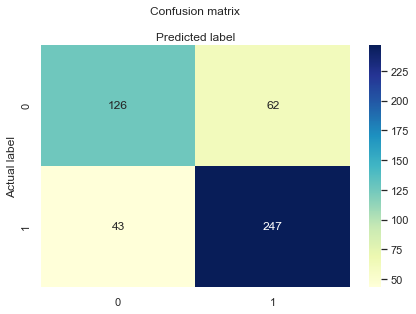

In [75]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)# Predicting the Test set results
y_pred = logreg.predict(X_test)#Evaluate results

print(classification_report(y_test,y_pred))
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

##accuracy on the training set
print('training set accuracy: ', round(logreg.score(X_train, y_train) * 100, 2))
## accuracy on the test set 
print('test set accuracy: ', round(logreg.score(X_test, y_test)*100, 2))

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Decision Tree Model

In [76]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print(dt_model.feature_importances_)
print(X_train.columns)

[0.01483344 0.00149359 0.00566388 0.04042385 0.0678802  0.00633986
 0.00067436 0.00738878 0.03147562 0.03338402 0.01703837 0.0057305
 0.02892292 0.01575934 0.02008324 0.00968879 0.01773974 0.00818794
 0.00476399 0.01581965 0.01636254 0.06058088 0.0127608  0.00091042
 0.0007727  0.00277554 0.08417737 0.01477336 0.06207244 0.02267145
 0.         0.04199232 0.03690023 0.00192033 0.01138587 0.00451473
 0.02478096 0.00329199 0.00555013 0.01006472 0.         0.21583602
 0.         0.         0.01090228 0.00171084 0.        ]
Index(['Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Special.Pay', 'Tuition',
       'FRP.Active', 'FRP.Cancelled', 'FRP.Take.up.percent.', 'Cancelled.Pax',
       'Total.Discount.Pax', 'Poverty.Code', 'Region', 'CRM.Segment',
       'School.Type', 'Parent.Meeting.Flag', 'MDR.Low.Grade', 'MDR.High.Grade',
       'Total.School.Enrollment', 'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Produ

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       188
         1.0       0.80      0.85      0.82       290

    accuracy                           0.78       478
   macro avg       0.77      0.76      0.77       478
weighted avg       0.78      0.78      0.78       478



Text(0.5, 257.44, 'Predicted label')

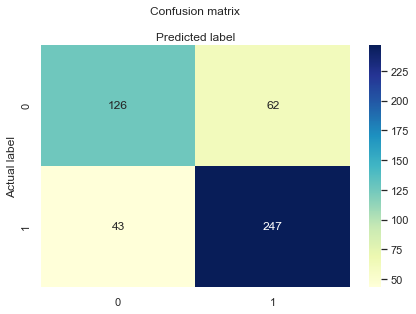

In [77]:
max_depth = 13
criterion = 'gini'
dt_model_params = tree.DecisionTreeClassifier(max_depth = max_depth, criterion=criterion)
dt_model_params.fit(X_train, y_train) 

dt_model_predictions = dt_model.predict(X_test)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, dt_model_predictions)
cnf_matrix

#Evaluating
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

#Plotting Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [78]:
print('Tree depth: ', dt_model_params.get_depth())
print('Number of leaf nodes: ', dt_model_params.get_n_leaves())
print('Training set accuracy: ', round(dt_model_params.score(X_train, y_train) * 100, 2))
print('Test set accuracy: ', round(dt_model_params.score(X_test, y_test)*100, 2))

print("Accuracy:",round(metrics.accuracy_score(y_test, dt_model_predictions)*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, dt_model_predictions)*100,2))
print("Recall:",round(metrics.recall_score(y_test, dt_model_predictions)*100,2))


Tree depth:  13
Number of leaf nodes:  270
Training set accuracy:  98.53
Test set accuracy:  69.67
Accuracy: 70.08
Precision: 74.92
Recall: 76.21


# Decision Tree visualization

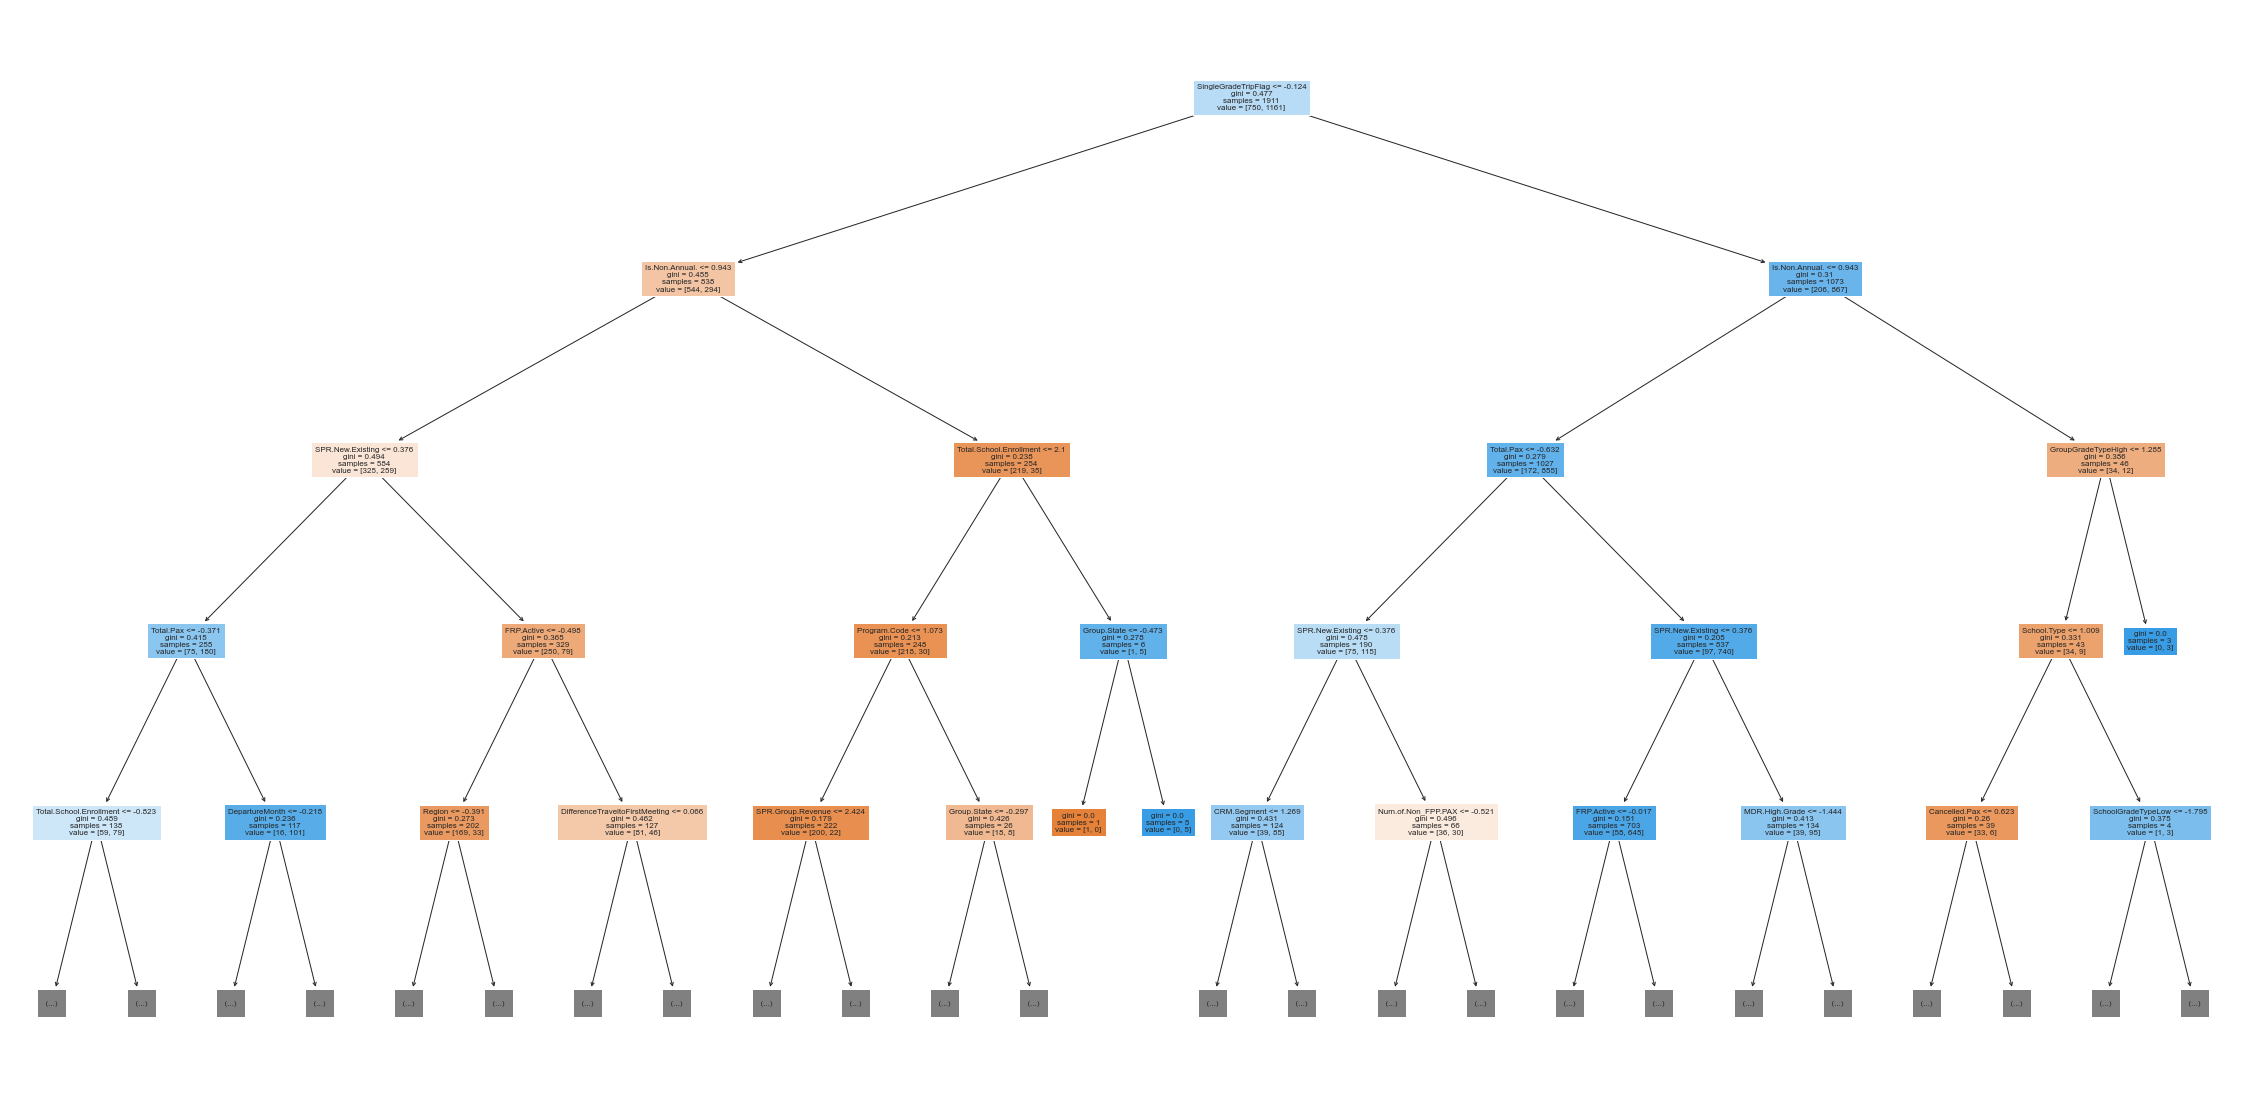

In [79]:

plt.figure(figsize=(40,20))
tree_plot = tree.plot_tree(dt_model_params, fontsize = 8, feature_names = X_train.columns, filled = True, max_depth = 4)
plt.show()

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       188
         1.0       0.80      0.85      0.82       290

    accuracy                           0.78       478
   macro avg       0.77      0.76      0.77       478
weighted avg       0.78      0.78      0.78       478

Training set accuracy:  98.74
Test set accuracy:  78.24
Accuracy: 78.24
Precision: 80.59
Recall: 84.48


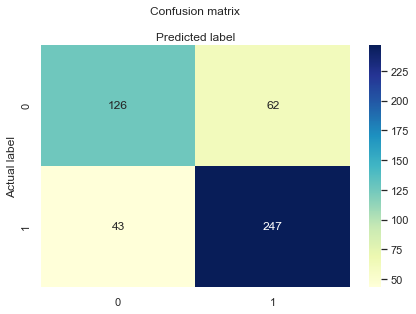

In [80]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
max_depth = 13
criterion = 'gini'
n_estimators = 150
dt_model_rf = RandomForestClassifier(max_depth = max_depth, criterion = criterion, n_estimators = n_estimators)
dt_model_rf.fit(X_train, y_train)

# Random Forest Prediction
rf_predict=dt_model_rf.predict(X_test)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, rf_predict)
cnf_matrix

#Evaluating
print(classification_report(y_test,y_pred))

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

#Plotting Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Training set accuracy: ', round(dt_model_rf.score(X_train, y_train) * 100, 2))
print('Test set accuracy: ', round(dt_model_rf.score(X_test, y_test)*100, 2))

print("Accuracy:",round(metrics.accuracy_score(y_test, rf_predict)*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, rf_predict)*100,2))
print("Recall:",round(metrics.recall_score(y_test, rf_predict)*100,2))

# Random forest

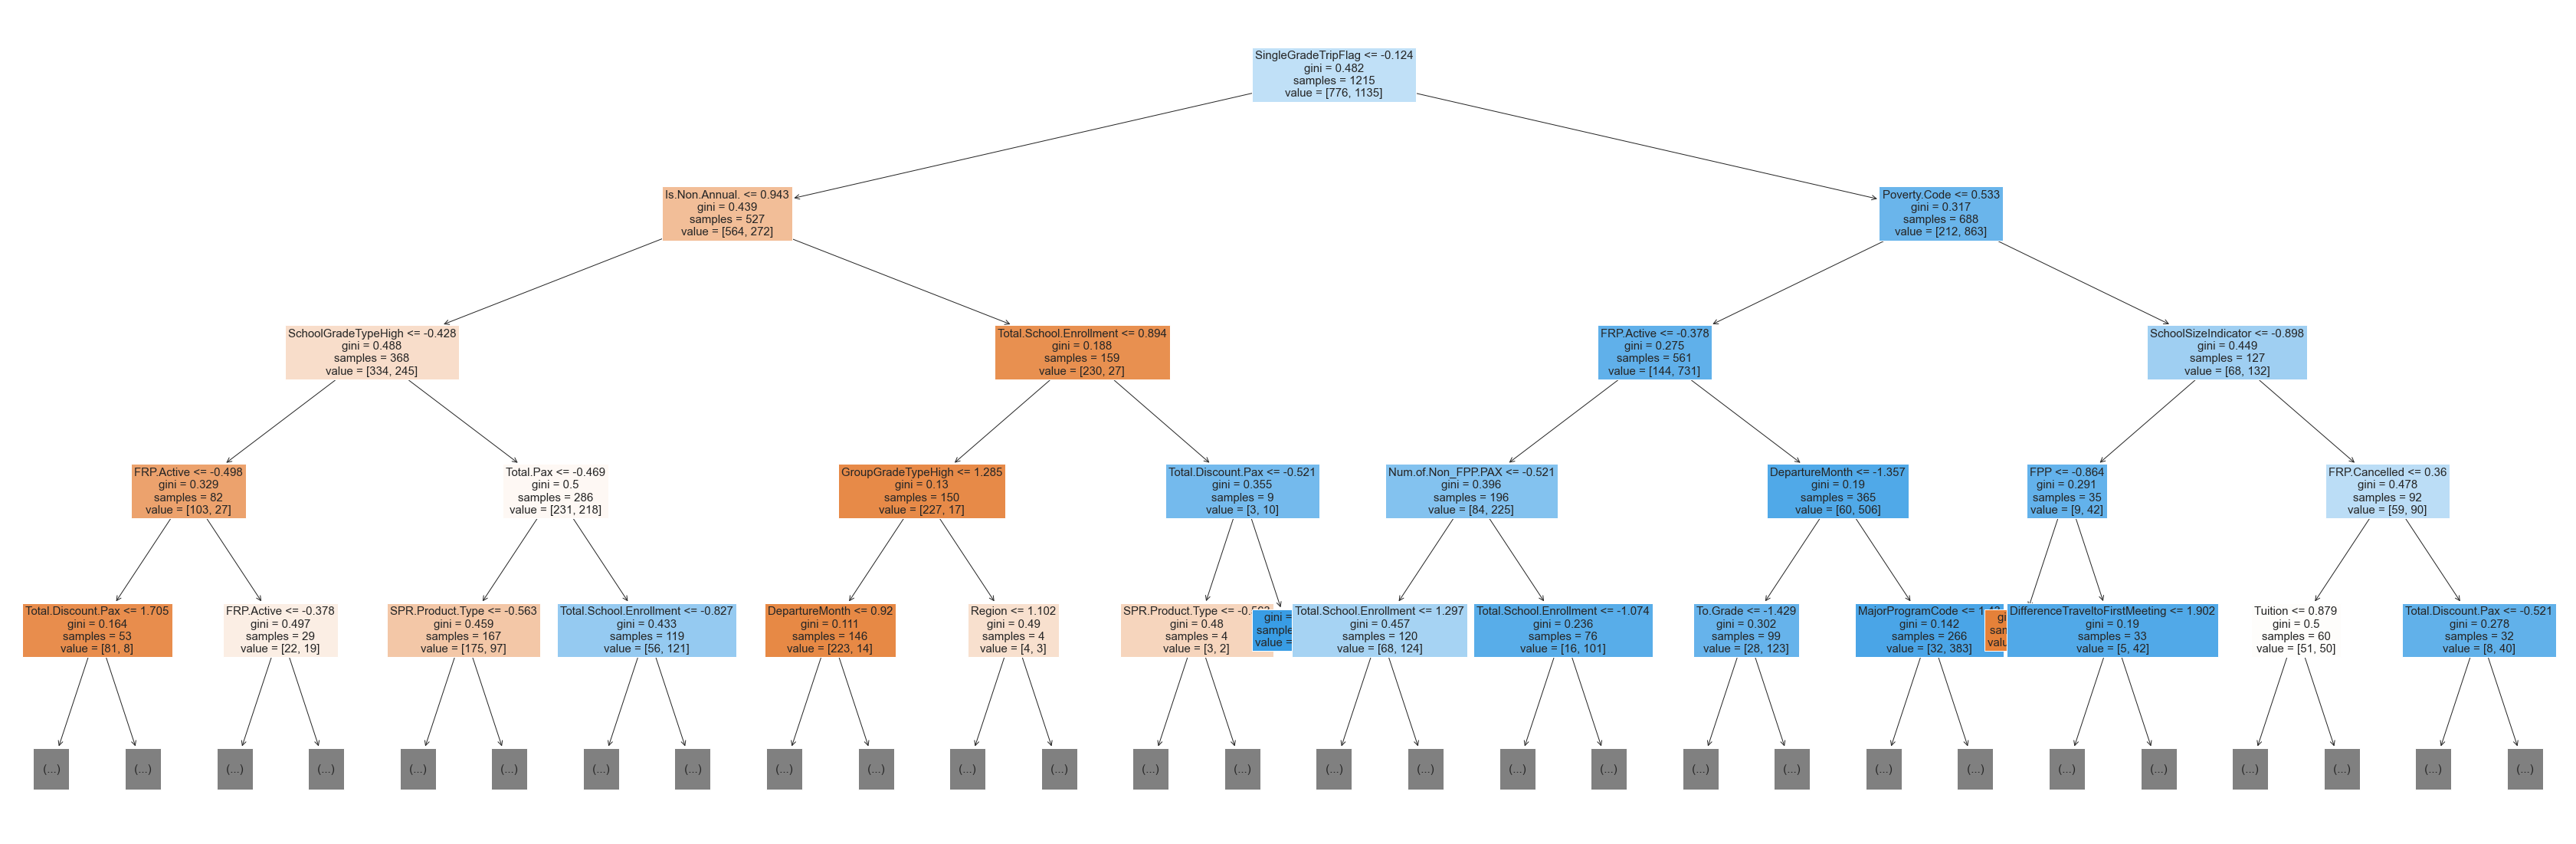

In [81]:
plt.figure(figsize=(60,20))
tree.plot_tree(dt_model_rf[4],fontsize = 15, feature_names = X_train.columns,filled = True, max_depth=4) #Model of 4th estimator
plt.show()

# KNN model

In [82]:
knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform')
knn_results = knn.fit(X_train, y_train)



In [83]:
y_pred = knn_results.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
y_pred = knn_results.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66       188
         1.0       0.77      0.80      0.79       290

    accuracy                           0.74       478
   macro avg       0.73      0.72      0.72       478
weighted avg       0.74      0.74      0.74       478



# clustering and finding the optimal k value  with elbow method

In [84]:
import pkgs

In [85]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [86]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [87]:
model = KMeans()

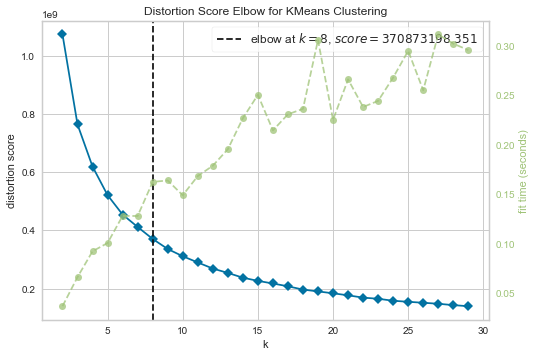

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)

visualizer.fit(encode_data)        
visualizer.show() 

In [89]:
k = KMeans(n_clusters=2)

In [90]:
y1_pred = k.fit_predict(encode_data)  

In [91]:
dt1['Cluster_prediction'] = y1_pred
dt1

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,FirstMeet,Cluster_prediction
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,2010-08-30,Not Available,424.0,25.0,3.0,0.424,2010-03-29,2010-08-12,3.0,4.0,2010-03-26,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.000000,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,2010-08-12,2010-08-12,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0,1,1
2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,2009-11-15,CP,2350.0,9.0,9.0,0.409,2009-10-20,2010-08-10,11.0,3.0,2009-10-02,C,Other,10.0,PUBLIC,1.0,7,8.0,850.000000,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,2009-11-17,2010-08-27,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0,1,0
3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,2010-10-15,Not Available,1181.0,17.0,6.0,0.708,2010-04-29,2010-08-16,6.0,3.0,2010-01-28,C,Other,10.0,PUBLIC,1.0,6,8.0,955.000000,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,2010-09-13,2010-09-13,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0,1,1
4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,2011-01-07,Not Available,376.0,0.0,0.0,0.000,NaT,NaT,1.0,0.0,2010-10-19,NaN,Other,7.0,CHD,0.0,NaN,NaN,648.358573,NaN,0.000,0.0,East Coast,EXISTING,18.0,18.0,376.0,0.0,NaT,NaT,0.0,0.0,High,High,High->High,January,Undefined,Undefined,Undefined->Undefined,H,0.0,0.066184,1.000000,0.0,NaN,0.0,0,1
5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,2010-09-30,Not Available,865.0,40.0,8.0,0.494,2010-03-29,2010-08-12,9.0,8.0,2010-03-23,D,Other,10.0,PUBLIC,1.0,6,8.0,720.000000,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,2010-08-24,2010-08-24,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,HC,7.0,8.0,CA,0.0,5.0,A,2011-06-28,2011-07-02,2010-12-15,Not Available,1892.0,18.0,4.0,0.514,NaT,2010-11-04,7.0,3.0,2010-11-04,C,Southern California,10.0,PUBLIC,0.0,6,8.0,1844.000000,D,0.057,0.0,East Coast,EXISTING,35.0,38.0,1892.0,0.0,NaT,NaT,0.0,0.0,Middle,Middle,Middle->Middle,June,Middle,Middle,Middle->Middle,H,0.0,0.018980,0.921053,3.0,L,0.0,0,0
2386,HD,8.0,8.0,CA,0.0,5.0,A,2011-06-29,2011-07-03,2010-10-15,FR,1699.0,16.0,4.0,0.800,2010-04-26,2010-09-07,4.0,2.0,2010-04-27,C,Southern California,4.0,PUBLIC,1.0,K,6.0,575.000000,Q,0.350,0.0,East Coast,EXISTING,20.0,22.0,1699.0,2.0,2010-05-06,2010-10-07,419.0,265.0,Middle,Middle,Middle->Middle,June,K,Middle,K->Middle,H,1.0,0.034783,0.909091,2.0,S-M,1.0,1,0
2387,HD,10.0,12.0,CA,0.0,6.0,A,2011-06-29,2011-07-05,2011-01-18,SA,2149.0,0.0,0.0,0.000,NaT,2010-12-08,0.0,4.0,2010-12-08,NaN,Northern California,7.0,PUBLIC,0.0,NaN,NaN,648.358573,NaN,0.000,0.0,East Coast,NEW,30.0,34.0,2149.0,0.0,NaT,NaT,0.0,0.0,High,High,High->High,June,Unde

In [92]:
k.cluster_centers_

array([[8.01118012e+00, 7.16894410e+00, 7.34720497e+00, 2.37192547e+01,
        1.68322981e-01, 5.12422360e+00, 4.34782609e-03, 1.85838509e+00,
        1.98586025e+03, 1.39099379e+01, 3.30931677e+00, 7.04968944e-01,
        4.75652174e+00, 2.44347826e+00, 2.17763975e+00, 2.84782609e+00,
        4.42608696e+00, 1.78881988e+00, 8.98757764e-01, 7.65031056e+00,
        8.73167702e+00, 6.73590683e+02, 1.15745342e+01, 3.97515528e-02,
        5.46583851e-02, 2.23478261e+00, 3.43478261e-01, 2.36652174e+01,
        2.61086957e+01, 1.98586025e+03, 1.17267081e+00, 2.42159627e+02,
        2.09693168e+02, 1.87453416e+00, 1.87577640e+00, 5.65465839e+00,
        2.76645963e+00, 2.76211180e+00, 1.78881988e+00, 7.42546584e+00,
        1.17142857e+00, 4.95031056e-01, 6.21118012e-04, 1.00000000e+00,
        2.44347826e+00, 1.47018634e+00, 5.65217391e-01, 8.98757764e-01],
       [8.52246470e+00, 6.74582798e+00, 6.94223363e+00, 2.04236200e+01,
        1.24518614e-01, 3.44030809e+00, 4.90372272e-01, 1.87419

In [93]:
data1 = dt1[dt1.Cluster_prediction==0][dt1['Retained.in.2012.']==1]
data2 = dt1[dt1.Cluster_prediction==1][dt1['Retained.in.2012.']==1]

C:\Users\91996\AppData\Local\Temp\ipykernel_9184\2372974961.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = dt1[dt1.Cluster_prediction==0][dt1['Retained.in.2012.']==1]
C:\Users\91996\AppData\Local\Temp\ipykernel_9184\2372974961.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2 = dt1[dt1.Cluster_prediction==1][dt1['Retained.in.2012.']==1]


In [94]:
data1

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,FirstMeet,Cluster_prediction
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,2009-11-15,CP,2350.0,9.0,9.0,0.409,2009-10-20,2010-08-10,11.0,3.0,2009-10-02,C,Other,10.0,PUBLIC,1.0,7,8.0,850.000000,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,2009-11-17,2010-08-27,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0,1,0
6,HC,10.0,12.0,LA,0.0,4.0,A,2011-01-17,2011-01-20,2010-09-30,Not Available,2025.0,9.0,4.0,0.900,2010-03-16,2010-10-06,3.0,1.0,2010-03-16,C,Other,8.0,PUBLIC,1.0,10,12.0,939.000000,I,0.100,0.0,East Coast,NEW,10.0,11.0,2025.0,1.0,2010-10-18,2010-10-18,91.0,91.0,High,High,High->High,January,High,High,High->High,H,0.0,0.010650,0.909091,1.0,L,1.0,1,0
9,CC,8.0,8.0,AZ,0.0,8.0,A,2011-01-29,2011-02-05,2010-06-01,CP,2200.0,30.0,0.0,0.577,2010-02-12,2010-02-12,0.0,4.0,2010-02-11,NaN,Other,5.0,CHD,1.0,6,12.0,500.000000,K,0.231,0.0,East Coast,EXISTING,52.0,56.0,2200.0,1.0,2010-09-08,2010-09-08,143.0,143.0,Middle,Middle,Middle->Middle,January,Middle,High,Middle->High,C,1.0,0.104000,0.928571,4.0,S-M,1.0,1,0
10,HD,8.0,8.0,TX,0.0,4.0,A,2011-02-07,2011-02-10,2010-10-25,Not Available,1428.0,51.0,1.0,0.773,2010-04-01,2010-08-11,1.0,6.0,2010-03-31,NaN,Houston,5.0,Private non-Christian,1.0,PK,8.0,635.000000,K,0.136,0.0,East Coast,EXISTING,66.0,72.0,1428.0,1.0,2010-09-14,2010-09-14,146.0,146.0,Middle,Middle,Middle->Middle,February,PK,Middle,PK->Middle,H,1.0,0.103937,0.916667,6.0,M-L,1.0,1,0
13,HD,8.0,8.0,CA,0.0,6.0,A,2011-02-12,2011-02-17,2010-10-15,Not Available,2278.0,10.0,6.0,0.455,2010-02-24,2010-08-27,6.0,1.0,2010-02-24,A,Northern California,5.0,PUBLIC,1.0,6,8.0,670.000000,Q,0.136,0.0,East Coast,EXISTING,22.0,23.0,2278.0,1.0,2010-09-15,2010-09-15,150.0,150.0,Middle,Middle,Middle->Middle,February,Middle,Middle,Middle->Middle,H,1.0,0.032836,0.956522,1.0,M-L,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,HC,8.0,8.0,OR,0.0,6.0,A,2011-06-27,2011-07-02,2010-10-20,Not Available,2494.0,13.0,2.0,0.419,NaT,2010-09-09,4.0,2.0,2010-08-17,B,Pacific Northwest,5.0,PUBLIC,0.0,6,8.0,570.000000,Q,0.129,0.0,East Coast,EXISTING,31.0,33.0,2494.0,0.0,NaT,NaT,0.0,0.0,Middle,Middle,Middle->Middle,June,Middle,Middle,Middle->Middle,H,1.0,0.054386,0.939394,2.0,S-M,1.0,0,0
2383,SC,9.0,12.0,CA,0.0,7.0,A,2011-06-27,2011-07-03,2010-12-03,Not Available,2519.0,6.0,0.0,0.600,2010-11-08,2010-11-08,4.0,1.0,2010-11-05,B,Southern California,6.0,PUBLIC,1.0,9,12.0,1140.000000,O,0.100,0.0,Costa Rica,NEW,10.0,11.0,2519.0,1.0,2010-11-10,2010-11-10,229.0,229.0,High,High,High->High,June,High,High,High->High,S,0.0,0.008772,0.909091,1.0,L,1.0,1,0
2386,HD,8.0,8.0,CA,0.0,5.0,A,2011-06-29,2011-07-03,2010-10-15,FR,1699.0,16.0,4.0,0.800,2010-04-26,2010-09-07,4.0,2.0,2010-04-27,C,Southern California,4.0,PUBLIC,1.0,K,6.0,575.000000,Q,0.350,0.0,East Coast,EXISTING,20.0,22.0,1699.0,2.0,2010-05-06,2010-10-07,419.0,265.0,Middle,Midd

In [95]:
data2

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,FirstMeet,Cluster_prediction
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,2010-08-30,Not Available,424.0,25.0,3.0,0.424,2010-03-29,2010-08-12,3.0,4.0,2010-03-26,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.000000,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,2010-08-12,2010-08-12,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0,1,1
3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,2010-10-15,Not Available,1181.0,17.0,6.0,0.708,2010-04-29,2010-08-16,6.0,3.0,2010-01-28,C,Other,10.0,PUBLIC,1.0,6,8.0,955.000000,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,2010-09-13,2010-09-13,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0,1,1
11,CD,8.0,8.0,FL,0.0,4.0,A,2011-02-07,2011-02-10,2010-09-30,Not Available,999.0,47.0,1.0,0.566,2010-09-02,2010-09-02,1.0,4.0,2010-03-31,NaN,Other,10.0,CHD,1.0,K,12.0,746.000000,O,0.096,1.0,East Coast,EXISTING,83.0,87.0,999.0,1.0,2010-09-09,2010-09-09,151.0,151.0,Middle,Middle,Middle->Middle,February,K,High,K->High,C,1.0,0.111260,0.954023,4.0,M-L,1.0,1,1
12,HD,8.0,8.0,FL,0.0,4.0,A,2011-02-07,2011-02-10,2010-10-15,Not Available,1388.0,32.0,0.0,0.800,2010-02-11,2010-08-20,0.0,5.0,2010-02-11,NaN,Other,10.0,CHD,1.0,PK,8.0,650.000000,L,0.300,1.0,East Coast,EXISTING,40.0,45.0,1388.0,1.0,2010-09-14,2010-09-14,146.0,146.0,Middle,Middle,Middle->Middle,February,PK,Middle,PK->Middle,H,1.0,0.061538,0.888889,5.0,M-L,1.0,1,1
19,HD,8.0,8.0,IA,0.0,3.0,A,2011-02-16,2011-02-19,2010-10-15,Not Available,1393.0,25.0,2.0,0.658,2010-02-04,2010-08-23,3.0,3.0,2010-02-05,B,Other,10.0,PUBLIC,1.0,6,8.0,360.000000,K,0.395,0.0,East Coast,EXISTING,38.0,41.0,1393.0,1.0,2010-09-02,2010-09-02,167.0,167.0,Middle,Middle,Middle->Middle,February,Middle,Middle,Middle->Middle,H,1.0,0.105556,0.926829,3.0,S-M,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,HD,7.0,8.0,FL,0.0,3.0,B,2011-06-21,2011-06-25,2010-10-20,FR,889.0,12.0,4.0,0.667,NaT,2010-08-24,8.0,2.0,2010-08-19,B,Other,10.0,PUBLIC,1.0,6,8.0,778.000000,L,0.167,0.0,East Coast,NEW,18.0,20.0,889.0,1.0,2010-09-21,2010-09-21,273.0,273.0,Middle,Middle,Middle->Middle,June,Middle,Middle,Middle->Middle,H,0.0,0.023136,0.900000,2.0,M-L,1.0,1,1
2304,HS,4.0,4.0,CA,0.0,1.0,A,2011-06-22,2011-06-22,2010-11-30,FR,425.0,2.0,0.0,0.111,NaT,2010-09-20,1.0,1.0,2010-09-10,C,Southern California,4.0,PUBLIC,0.0,K,5.0,650.000000,I,0.056,0.0,CA History,EXISTING,18.0,19.0,425.0,0.0,NaT,NaT,0.0,0.0,Elementary,Elementary,Elementary->Elementary,June,K,Elementary,K->Elementary,H,1.0,0.027692,0.947368,1.0,M-L,1.0,0,1
2322,HVP,8.0,8.0,NJ,0.0,3.0,B,2011-06-23,2011-06-25,2011-01-07,Not Available,399.0,32.0,5.0,0.744,NaT,2010-11-23,5.0,4.0,2010-11-24,A,Other,2.0,PUBLIC,0.0,6,8.0,1154.000000,P,0.209,0.0,East Coast,NEW,43.0,47.0,399.0,0.0,NaT,NaT,0.0,0.0,Middle,Middle,Middle->Middle,Jun